Solution Found. Total Error :  0.009941535257162345
Input Layer Weights :  [[ 4.36276743  5.89763515 -2.00028758 -4.31370599]
 [ 3.55925992 -0.64038906 -4.65241257  2.17087214]
 [-2.36298815 -3.63559571 -2.83849946 -3.72109529]]
Hidden Layer Weights :  [[-4.15816954 -2.69843839 -3.737442   -2.08024349 -3.67363204]
 [-1.00799444 -2.04168828 -0.16471643 -2.07755243 -0.5626985 ]
 [-4.02276001 -3.28210702 -3.5625064  -2.47534493 -3.13024021]
 [-4.27116052 -3.99089382 -2.99712651 -3.3447693  -3.60054913]]
Output Layer Weights :  [[-5.28980948]
 [-3.80583209]
 [-2.84755686]
 [ 0.8035733 ]
 [-1.33930058]]
Input Layer Bias :  [-3.7191212  -1.69938886 -3.12730727 -1.69740722]
Hidden Layer Bias :  [1.74103869 1.43523159 1.06064755 0.95213988 1.18396929]
Output Layer Bias :  [5.06075146]


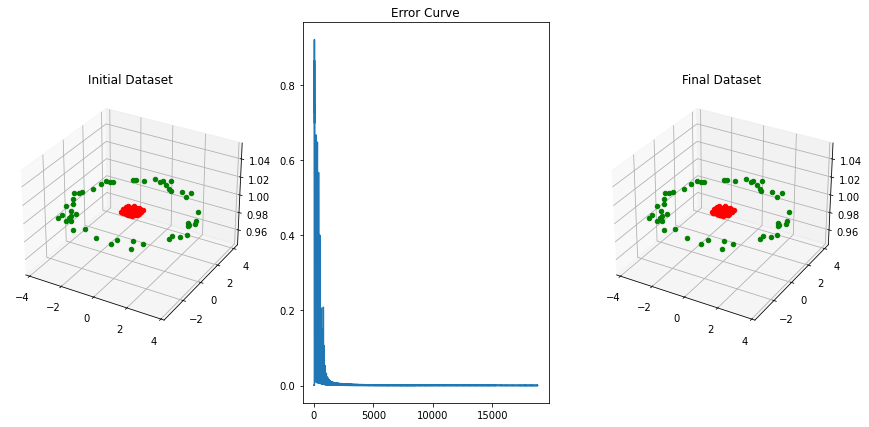

In [1]:
%matplotlib inline
import numpy as np
import random
from matplotlib import pyplot as plt
import math

def sigmoid(uVal):
    return (1/(1+(np.exp(-uVal))))

def sigmoid_prime(uVal):
    return uVal*(1-uVal)

# features=3
lr=0.7
errorList=[]

x1=list(np.random.uniform(-0.5,0.5,50))
y1=list(np.random.uniform(-0.5,0.5,50))
x3=np.ones(100)


t=list(np.zeros(50))

deg=np.random.uniform(0,360,50)
r=np.random.uniform(3,4,50)

for i in range(0,len(deg)):
    degInRad=(deg[i]*math.pi)/180
    
    r_ran=np.random.choice(r)
    x=r_ran*math.cos(degInRad)
    y=r_ran*math.sin(degInRad)
     
    x1.append(x)
    y1.append(y)
    t.append(1)
t=np.array(t).reshape(100,1)
x=np.array([list(a) for a in zip(x1, y1, x3)])

features=3
in_nodes=4
hid_nodes=5
out_nodes=1

w1=np.random.uniform(-2.0,2,[features,in_nodes])
w2=np.random.uniform(-2.0,2,[in_nodes,hid_nodes])

w3=np.random.uniform(-2.0,2,[hid_nodes,out_nodes])


b1=np.random.uniform(-2.0,2,in_nodes)
b2=np.random.uniform(-2.0,2,hid_nodes)
b3=np.random.uniform(-2.0,2,out_nodes)


dw1=np.zeros([features,in_nodes])
dw2=np.zeros([in_nodes,hid_nodes])
dw3=np.zeros([hid_nodes,out_nodes])


db1=np.zeros(in_nodes)
db2=np.zeros(hid_nodes)
db3=np.zeros(out_nodes)



#while loop
while True:
    totalError=0
    for i in range(len(t)):
        zLayer=np.dot(x[i],w1)+b1
        zActivation=sigmoid(zLayer)
        
        #hidden layer
        uLayer=np.dot(zActivation,w2)+b2
        uActivation=sigmoid(uLayer)
        
        #output layer
        oLayer=np.dot(uActivation,w3)+b3
        y=sigmoid(oLayer)
        
        error=(y-t[i])**2
        der_error=(y-t[i])
        totalError+=error[0]
        errorList.append(error)
        
        dw3=np.multiply(lr*der_error*sigmoid_prime(y),uActivation)
        db3=lr*der_error*sigmoid_prime(y)
        
        w3=np.subtract(w3,dw3.reshape(hid_nodes,1))
        b3=b3-db3
        
        sum=np.sum(der_error*sigmoid_prime(y)*w3)
        dw2=np.multiply(zActivation.reshape(in_nodes,1),lr*sigmoid_prime(uActivation)*sum)
        db2=lr*sigmoid_prime(uActivation)*sum
        w2=w2-dw2
        b2=b2-db2
        
        
        sum_input=np.sum(sum*sigmoid_prime(uActivation)*w2)
        dw1=np.multiply(x[i].reshape(features,1),sum_input*sigmoid_prime(zActivation)*lr)
        db1=sum_input*sigmoid_prime(zActivation)*lr
        w1=w1-dw1
        b1=b1-db1
        
       
    if(totalError<0.01):
        print('Solution Found. Total Error : ',totalError)
        break;
print('Input Layer Weights : ',w1)
print('Hidden Layer Weights : ',w2)
print('Output Layer Weights : ',w3)
print('Input Layer Bias : ',b1)
print('Hidden Layer Bias : ',b2)
print('Output Layer Bias : ',b3)

#plotting initial Dataset
fig = plt.figure(figsize=(15,7))  
ax = fig.add_subplot(1,3,1,projection='3d')   
plt.title('Initial Dataset')
for i in range(len(x1)):
    if(t[i]==0):

        ax.scatter(x1[i],y1[i],x3[i],color='red')
    else:
        ax.scatter(x1[i],y1[i],x3[i],color='green')
        
#plotting error curve        
ax2=fig.add_subplot(1,3,2) 
plt.title('Error Curve')
ax2.plot(errorList)

#plotting the final dataset and verifying with the prediction
ax3 = fig.add_subplot(1,3,3,projection='3d')
plt.title('Final Dataset')
for i in range(len(t)):
    zLayer=np.dot(x[i],w1)+b1
    zActivation=sigmoid(zLayer)

    #hidden layer
    uLayer=np.dot(zActivation,w2)+b2
    uActivation=sigmoid(uLayer)

    #output layer
    oLayer=np.dot(uActivation,w3)+b3
    y_predict=sigmoid(oLayer)

    
    if(y_predict<0.9):

        ax3.scatter(x1[i],y1[i],x3[i],color='red')
    else:
        ax3.scatter(x1[i],y1[i],x3[i],color='green')
    
    
plt.show()        



